We now proceed with the analysis for the paper [APT or AIPT: The Surprising Dominance of Large Factor Models](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4388526) by Antoine Didisheim, Barry Ke, Bryan Kelly, and Semyon Malamud.

Our monthly frequency dataset comes from [Is There a Replication Crisis in Finance?](https://jkpfactors.com/) and contains $153$ characteristics and realized returns for US publicly traded stocks from 1963-01-31 to 2019-12-31.

Many of the $153$ characteristics from  [Is There a Replication Crisis in Finance?](https://jkpfactors.com/) have significant fractions of missing values, especially in the early parts of the sample. For this reason, we first pre-select $132$ characteristics with the smallest percentage of missing values. This ensures that the characteristics composition is more homogeneous over time. In the sequel, we use $N_t$ to denote the number of such ``eligible" stocks available at time $t.$

Every date, for each characteristic $k=1,\cdots,d,$ there are $n_t(k)$ stocks with non-missing values cross-sectionally rank these characteristics (not including the missing values), replacing them with their rank between $0$ and $n_t(k).$ We then divide this rank by $n_t(k)$ and subtract $0.5,$ to get a normalized rank in $[-0.5, 0.5].$ We then fill in missing values of the $k$-th characteristic of the remaining $N_t-n_t(k)$ stocks with zeros. This way, we obtain a panel of characteristics $X_t=(X_{i,k,t})_{i,k}\in \mathbb R^{N_t\times d},\ d=110,$ taking values in $[-0.5, 0.5]$.  

We now define the $P>>d$ non-linear features that serve as an input to our pricing kernel expansion.
Our goal is to capture features {\it with varying degrees of non-linearity.} This is important: Linear features (i.e., those given by linear combinations of $X_t$) contain  information about future expected returns, as is shown by [Is There a Replication Crisis in Finance?](https://jkpfactors.com/). Following , we control the degree of non-linearity by introducing a grid of $G$ scale parameters, $\gamma_g,\ i=1,\cdots,G.$ In our analysis, we use a scale parameter $\gamma$, we draw a random weight matrix
$$
   W_g \sim \mathbb N(0,\gamma) \in  \mathbb R^{d\times (P/2)},
$$
Next, we define,
$$
    \hat S_{t}(\gamma) = \textit{concatenate}\left(\cos(X_t W_g), \sin(X_t W_g)\right)  \in \mathbb R^{N_t\times \frac{P}{G}}.
$$
Finally, we define the random factors,
$$
    F_{t+1} = R_{t+1}' S_t \in R^{P},
$$
where $R_{t+1} \in R^{N_t}$ is a vector stock returns.  
Thus, Factors are defined as $\sum_{stock} Signal_t(stock) * Return(stock)_{t+1}$


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
import os
folder = '/content/gdrive/My Drive/us_stock_market_data'
#!pip3 install pandas=='1.4.3'
import pandas as pd

Mounted at /content/gdrive


Our data has two files, 'usa.pkl' has the original raw data for many years and is huge (4 GB). We will be working with the smaller file 'usa_131_per_size_ranks_False.pkl' which is only 1 GB. Most importantly, the data are cross-sectionally ranked. Hence, on a given date, the distribution of a given signal across stocks is uniform  

r_1 is the most important column: next month stock returns. 'size_grp' tells us which size group the stock belong to (note that the size group changes over time as the stock price changes). id is the stock id.  

In [ ]:
# first we load the number of mega stocks per month
stock_data = pd.read_pickle(os.path.join(folder, 'usa_131_per_size_ranks_False.pkl')) # pd.read_pickle(os.path.join(folder, 'usa.pkl'))

In [ ]:
stock_data.shape, stock_data.columns

((2487008, 135),
 Index(['id', 'date', 'size_grp', 'cowc_gr1a', 'oaccruals_at', 'oaccruals_ni',
        'taccruals_at', 'taccruals_ni', 'debt_gr3', 'fnl_gr1a',
        ...
        'div12m_me', 'ebitda_mev', 'eq_dur', 'eqnpo_12m', 'eqnpo_me', 'eqpo_me',
        'ni_me', 'ocf_me', 'sale_me', 'r_1'],
       dtype='object', length=135))

In [ ]:
stock_data

,id,date,size_grp,cowc_gr1a,oaccruals_at,oaccruals_ni,taccruals_at,taccruals_ni,debt_gr3,fnl_gr1a,...,div12m_me,ebitda_mev,eq_dur,eqnpo_12m,eqnpo_me,eqpo_me,ni_me,ocf_me,sale_me,r_1
0,10006,1963-01-31,large,0.070236,0.420000,0.478462,-0.392308,-0.430769,0.452528,0.479282,...,-0.122528,0.095568,-0.256881,-0.162338,0.000000,0.000000,-0.147790,-0.465470,0.103591,0.036440
1,10014,1963-01-31,micro,0.488873,0.444615,0.446154,0.423077,0.438462,0.000000,0.411602,...,-0.500000,-0.127424,-0.143731,-0.409091,0.000000,0.000000,0.064917,-0.469613,0.232044,-0.035593
2,10102,1963-01-31,large,0.128651,0.349231,0.350769,0.226154,0.309231,0.163571,0.313536,...,0.138865,-0.159280,0.168196,-0.461039,0.000000,0.000000,-0.220994,-0.325967,-0.222376,-0.006685
3,10145,1963-01-31,mega,-0.168985,0.238462,0.226154,0.349231,0.344615,-0.207946,-0.207182,...,-0.009028,-0.220222,0.279817,-0.478896,0.000000,0.000000,-0.299724,-0.218232,-0.317680,-0.036420
4,10153,1963-01-31,large,-0.376217,-0.256923,-0.210769,-0.260000,-0.172308,-0.096491,-0.070442,...,0.221410,-0.336565,-0.481651,0.405844,0.000000,0.000000,-0.277624,0.088398,0.338398,-0.024319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2487003,93426,2022-11-30,small,0.000435,0.185551,0.202183,0.139719,0.141966,0.318271,-0.105762,...,-0.500000,0.198782,-0.103350,0.041766,-0.093366,-0.227869,0.153088,0.079917,0.120158,-0.050705
2487004,93427,2022-11-30,large,0.375254,0.370062,0.345114,0.340135,0.300832,-0.398225,-0.200753,...,-0.500000,-0.053451,0.083755,0.081543,0.056281,-0.013115,0.069279,-0.075246,0.012934,-0.042282
2487005,93434,2022-11-30,micro,-0.448941,-0.377339,-0.098233,-0.340915,-0.063703,0.274955,0.195302,...,-0.500000,-0.405277,0.441530,-0.372713,-0.437582,-0.096995,-0.456668,-0.426310,0.310213,0.338963
2487006,93436,2022-11-30,mega,-0.318103,-0.224532,-0.091476,0.188329,0.169527,-0.409950,-0.399040,...,-0.500000,-0.179026,0.252528,-0.310925,-0.186602,-0.381967,-0.070835,-0.085106,-0.353505,-0.370713


In [ ]:
len(stock_data.date.unique())

719

In [ ]:
stock_data.shape[0] / len(stock_data.date.unique())

3458.981919332406

In [ ]:
size_group = 'mega'
if size_group is not None:
  stock_data = stock_data.loc[stock_data.size_grp==size_group]

In [ ]:
stock_data['div12m_me'].describe()

,div12m_me
count,243906.000000
mean,0.063832
std,0.295515
min,-0.500000
25%,-0.079077
50%,0.118972
75%,0.294380
max,0.500000


In [ ]:
stock_data.set_index(['id', 'date'], inplace=True)

In [ ]:
print(stock_data.iloc[10,:])

size_grp            mega
cowc_gr1a      -0.061892
oaccruals_at   -0.127692
oaccruals_ni   -0.107692
taccruals_at       -0.06
                  ...   
eqpo_me              0.0
ni_me           0.339779
ocf_me          0.175414
sale_me        -0.009669
r_1             -0.01026
Name: (10786, 1963-01-31 00:00:00), Length: 133, dtype: object


In [ ]:
size_groups = stock_data.pop('size_grp')

In [ ]:
stock_data.dtypes.unique()

array([dtype('float32'), dtype('float64')], dtype=object)

In [ ]:
# the simplest are momentum signals
momentum_columns = [x for x in stock_data.columns if 'ret' in x]
print(momentum_columns)

['ret_12_1', 'ret_3_1', 'ret_6_1', 'ret_9_1', 'ret_12_7', 'ret_1_0']


Let us build momentum returns. Recall that Factors are defined as $\sum_{stock} Signal_t(stock) * Return(stock)_{t+1}$. 

We also call them Managed Returns

In [ ]:
def build_managed_returns(returns, signals):
  # I am using numpy broadcasting here
  managed_returns = (signals * returns.values.reshape(-1, 1)).groupby(signals.index.get_level_values('date')).sum()
  return managed_returns

In [ ]:
momentum_managed_returns = build_managed_returns(returns=stock_data['r_1'], signals=stock_data[momentum_columns])

In [ ]:
# get stock data on that particular date
dat = stock_data.loc[stock_data.index.get_level_values('date')=='2022-11-30']
dat
dat.describe()

,cowc_gr1a,oaccruals_at,oaccruals_ni,taccruals_at,taccruals_ni,debt_gr3,fnl_gr1a,ncol_gr1a,nfna_gr1a,noa_at,...,div12m_me,ebitda_mev,eq_dur,eqnpo_12m,eqnpo_me,eqpo_me,ni_me,ocf_me,sale_me,r_1
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,-0.052908,-0.001719,-0.047076,-0.009019,-0.035323,0.022360,-0.019868,0.000931,0.009065,0.016818,...,0.005661,0.030148,0.031383,0.157303,0.149959,0.117268,0.085523,0.101873,-0.088139,-0.054560
std,0.223547,0.225711,0.256278,0.227065,0.251815,0.221454,0.258461,0.282683,0.244894,0.234277,...,0.326252,0.184399,0.201656,0.224917,0.194797,0.206623,0.169297,0.174273,0.222594,0.061589
min,-0.497679,-0.485967,-0.497661,-0.484403,-0.494020,-0.500000,-0.467817,-0.491007,-0.490657,-0.479651,...,-0.500000,-0.420704,-0.491466,-0.487271,-0.453252,-0.381967,-0.391282,-0.424235,-0.433119,-0.428161
25%,-0.217000,-0.172687,-0.265982,-0.180400,-0.264171,-0.132470,-0.258370,-0.252538,-0.183104,-0.144331,...,-0.500000,-0.098106,-0.097819,0.056219,0.029642,0.000000,-0.027893,-0.036066,-0.272819,-0.088620
50%,-0.054975,-0.001040,-0.045998,-0.004289,-0.009620,0.009200,-0.015183,-0.002466,0.013626,0.004360,...,0.082758,0.000000,0.062895,0.197163,0.173544,0.140437,0.054489,0.076284,-0.116807,-0.048226
75%,0.102118,0.156965,0.185291,0.171757,0.171542,0.192884,0.172333,0.264868,0.218401,0.185029,...,0.256858,0.126116,0.184735,0.319676,0.298773,0.280191,0.184094,0.234821,0.062659,-0.015320
max,0.484914,0.487786,0.495842,0.462828,0.496100,0.493486,0.492733,0.488106,0.446535,0.498547,...,0.488057,0.492693,0.497788,0.496553,0.488248,0.484699,0.495330,0.475610,0.482844,0.131330


In [ ]:
# let us see the magic of numpy broadcasting
tmp = dat['r_1'].values.reshape(-1, 1) * dat[momentum_columns]
print(tmp)

                  ret_12_1   ret_3_1   ret_6_1   ret_9_1  ret_12_7   ret_1_0
id    date                                                                  
10104 2022-11-30 -0.001199 -0.003909 -0.004473 -0.004551  0.001400 -0.002150
10107 2022-11-30  0.007098  0.014394  0.010967  0.006658  0.002285 -0.015321
10138 2022-11-30  0.030174  0.025534  0.021273  0.016583  0.034091 -0.045116
10145 2022-11-30 -0.006026 -0.007087 -0.005082 -0.007895 -0.004109 -0.004759
10516 2022-11-30 -0.023085 -0.015597 -0.010533 -0.020027 -0.023743  0.004201
...                    ...       ...       ...       ...       ...       ...
93089 2022-11-30 -0.000038  0.000360 -0.007133 -0.009780 -0.002768  0.004122
93094 2022-11-30 -0.011041 -0.006369  0.003132 -0.009735 -0.011259  0.003746
93096 2022-11-30 -0.012554 -0.009817 -0.011880 -0.015613 -0.011612  0.004282
93132 2022-11-30 -0.004094 -0.033435 -0.002529  0.004141 -0.000453  0.024911
93436 2022-11-30  0.079215  0.122560  0.036685  0.037460  0.056991  0.140821

In [ ]:
factor_returns_on_the_date = tmp.sum()
factor2 = momentum_managed_returns.loc['2022-11-30']
tmp1 = pd.concat([factor_returns_on_the_date, factor2], axis=1)
print(tmp1)

                 0  2022-11-30 00:00:00
ret_12_1 -1.180183            -1.180183
ret_3_1  -0.734016            -0.734016
ret_6_1  -0.516045            -0.516045
ret_9_1  -1.031057            -1.031057
ret_12_7 -1.121620            -1.121620
ret_1_0  -2.047559            -2.047559


In [ ]:
def sharpe_ratio(returns):
  """
  The data is at monthly frequency, hence we multiply by sqrt(12)
  """
  return np.round(np.sqrt(12) * returns.mean() / returns.std(), 2)

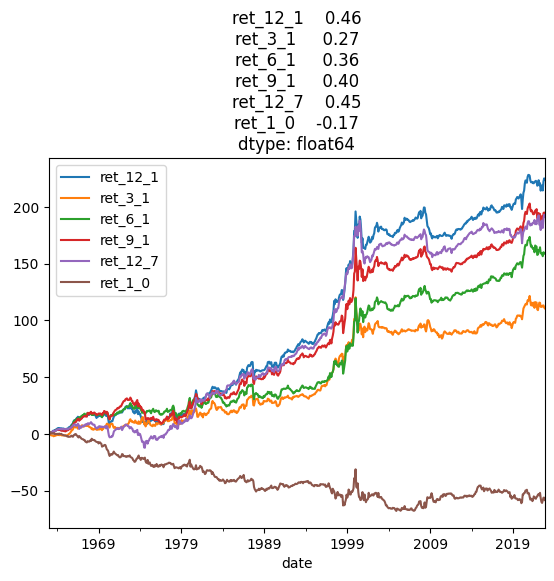

In [ ]:
momentum_managed_returns.cumsum().plot()
sr = sharpe_ratio(momentum_managed_returns)
plt.title(f'{sr}')
plt.show()

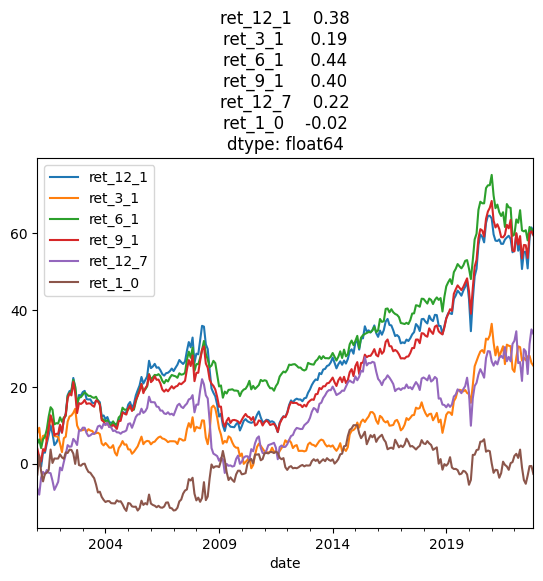

In [ ]:
momentum_managed_returns.loc['2001-01-01':].cumsum().plot()
sr = sharpe_ratio(momentum_managed_returns.loc['2001-01-01':])
plt.title(f'{sr}')
plt.show()

We now build a "feasible" benchmark that uses equal-weighted averaging of returns with the sign of the "direction" chosen purely based on past data

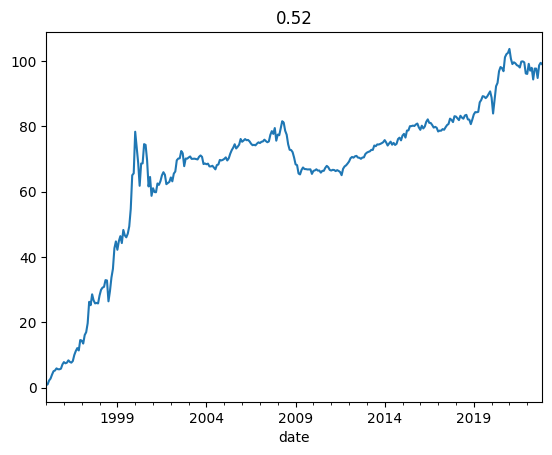

In [ ]:
simple_benchmark = (momentum_managed_returns * np.sign(momentum_managed_returns.shift(1).expanding().sum())).mean(1)
simple_benchmark.loc['1995-01-01':].cumsum().plot()
sr = sharpe_ratio(simple_benchmark.loc['1995-01-01':])
plt.title(f'{sr}')
plt.show()

We are now going to use an important discovery made it [Momentum Has Its Moments](https://www.sciencedirect.com/science/article/abs/pii/S0304405X14002566): Momentum risk is highly predictable

In [ ]:
def volatility_managed_returns(rets, window):
  return rets / rets.rolling(window).std().shift(1)

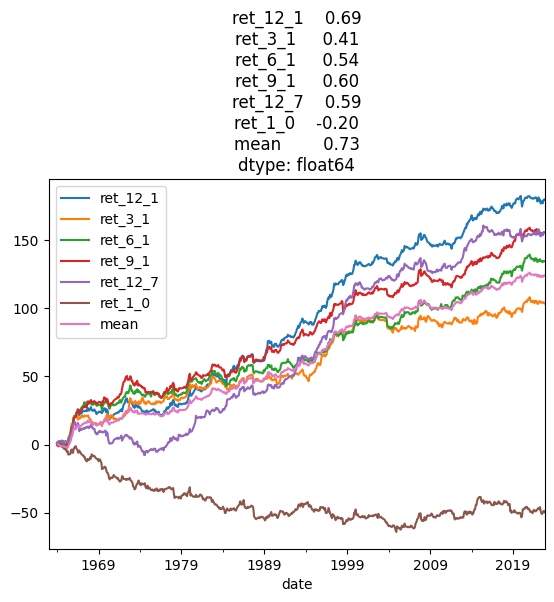

In [ ]:
# let us do risk-managed momentum following "Momentum has its moments"
managed = volatility_managed_returns(momentum_managed_returns, 12)
simple_managed_benchmark = (managed * np.sign(managed.shift(1).expanding().sum())).mean(1)
managed['mean'] = simple_managed_benchmark
managed.cumsum().plot()
sr = sharpe_ratio(managed)
plt.title(f'{sr}')
plt.show()

In [ ]:
market = stock_data.r_1.groupby('date').mean()
tmp = pd.concat([market, simple_benchmark, simple_managed_benchmark], axis=1)
print(tmp.corr())

          r_1         0         1
r_1  1.000000  0.402288  0.407739
0    0.402288  1.000000  0.782688
1    0.407739  0.782688  1.000000


Suppose that we have $F\in \mathbb R^{T\times P}.$ We will use the formula $F'(zI+FF'/T)^{-1} = (zI+F'F/T)^{-1}F'.$ Now, our optimal portfolio is based on $\bar F =F' {\bf 1}/T$ where ${\bf 1}=vector\ of\ ones.$ Thus, the efficient portfolio is $(zI+F'F/T)^{-1}\bar F_T\ =\ (zI+F'F/T)^{-1}F'{\bf 1}/T\ =\ F'(zI+FF'/T)^{-1}{\bf 1}/T$. Thus, instead of inverting a $P\times P$ matrix, we can invert a $T\times T$ matrix.

In [ ]:
def ridge_regr(signals: np.ndarray,
                  labels: np.ndarray,
                  future_signals: np.ndarray,
                  shrinkage_list: np.ndarray):
    """
    Regression is
    beta = (zI + S'S/t)^{-1}S'y/t = S' (zI+SS'/t)^{-1}y/t
    Inverting matrices is costly, so we use eigenvalue decomposition:
    (zI+A)^{-1} = U (zI+D)^{-1} U' where UDU' = A is eigenvalue decomposition,
    and we use the fact that D @ B = (diag(D) * B) for diagonal D, which saves a lot of compute cost
    :param signals: S
    :param labels: y
    :param future_signals: out of sample y
    :param shrinkage_list: list of ridge parameters
    :return:
    """
    t_ = signals.shape[0]
    p_ = signals.shape[1]
    if p_ < t_:
        # this is standard regression
        eigenvalues, eigenvectors = np.linalg.eigh(signals.T @ signals / t_)
        means = signals.T @ labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)
        betas = eigenvectors @ intermed
    else:
        # this is the weird over-parametrized regime
        eigenvalues, eigenvectors = np.linalg.eigh(signals @ signals.T / t_)
        means = labels.reshape(-1, 1) / t_
        multiplied = eigenvectors.T @ means # this is \mu

        # now we build [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}] * \mu
        intermed = np.concatenate([(1 / (eigenvalues.reshape(-1, 1) + z)) * multiplied for z in shrinkage_list],
                                  axis=1)

        tmp = eigenvectors.T @ signals # U.T @ S
        betas = tmp.T @ intermed # (S.T @ U) @ [(z_1+\delta)^{-1}, \cdots, (z_K+\delta)^{-1}] * \mu
    predictions = future_signals @ betas
    return betas, predictions

In [ ]:
def efficient_portfolio_oos(raw_factor_returns: pd.DataFrame):
  """

  """

  split = int(raw_factor_returns.shape[0] / 2)
  in_sample = raw_factor_returns.iloc[:split, :].values
  shrinkage_list = [0.00000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
  _, optimal = ridge_regr(signals=in_sample,
                       labels=np.ones([in_sample.shape[0], 1]),
                       future_signals=raw_factor_returns.iloc[split:],
                       shrinkage_list=shrinkage_list)
  optimal.columns = shrinkage_list
  (optimal / optimal.std()).cumsum().plot()
  plt.title(f'{sharpe_ratio(optimal)}')
  return optimal, split

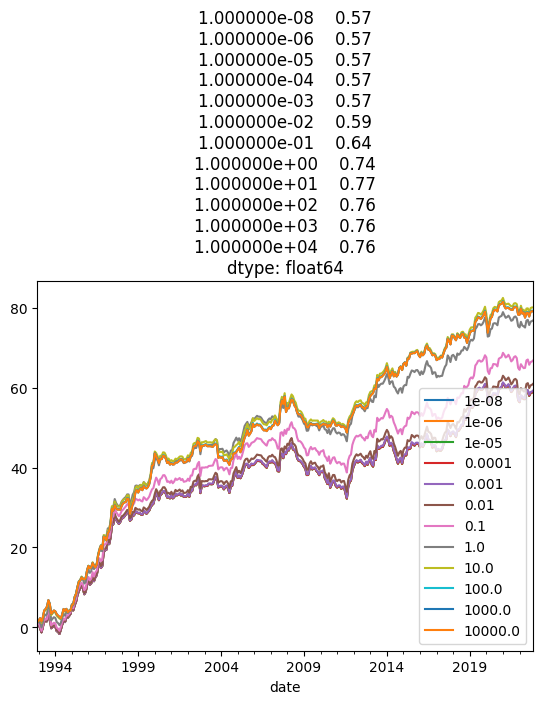

In [ ]:
optimal, split = efficient_portfolio_oos(raw_factor_returns=managed.fillna(0))#momentum_managed_returns)

In [ ]:
import statsmodels.api as sm

def regression_with_tstats(predicted_variable, explanatory_variables):
    x_ = explanatory_variables
    x_ = sm.add_constant(x_)
    y_ = predicted_variable
    # Newey-West standard errors with maxlags
    z_ = x_.copy().astype(float)
    result = sm.OLS(y_.values, z_.values).fit(cov_type='HAC', cov_kwds={'maxlags': 10})
    try:
        tstat = np.round(result.summary2().tables[1]['z'], 1)  # alpha t-stat (because for 'const')
        tstat.index = list(z_.columns)
    except:
        print(f'something is wrong for t-stats')
    return tstat

In [ ]:
tstats = pd.concat([regression_with_tstats(predicted_variable=optimal[col],
                                           explanatory_variables=simple_managed_benchmark.fillna(0).iloc[split:]) for col in optimal], axis=1)
tstats.columns = optimal.columns
print(tstats)

       1.000000e-08  1.000000e-06  1.000000e-05  1.000000e-04  1.000000e-03  \
const          -0.3          -0.3          -0.3          -0.3          -0.3   
0              14.9          14.9          14.9          14.9          15.0   

       1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  1.000000e+02  \
const          -0.2           0.1           0.4           0.3          -0.5   
0              15.2          17.1          28.9         190.6         239.5   

       1.000000e+03  1.000000e+04  
const          -0.5          -0.5  
0             206.1         203.1  


We now build factors based on random features

In [ ]:
def produce_random_feature_managed_returns(P, stock_data, signals, num_seeds=2):
  """
  Suppose I wanted to build P random features. Using the weights \Theta \in \R^{d\times P},
  I could just do signals @ \Theta. If signals are (NT)\times d dimensional, then
  signals @ \Theta are (NT) \times P dimensional.
  Inststead, we can generate random features in small chunks, compute factors and proceed further.
  """
  all_random_feature_managed_returns = pd.DataFrame()
  d = signals.shape[1]
  for seed in range(num_seeds):
    # every seed gives me a new chunk of factors
    np.random.seed(seed)
    omega = scale * np.sqrt(2) * np.random.randn(P, d) / np.sqrt(d)
    ins_sin = np.sqrt(2) * np.sin(signals @ omega.T) # signals @ \Theta are (NT) \times P dimensional.
    ins_cos = np.sqrt(2) * np.cos(signals @ omega.T) # signals @ \Theta are (NT) \times P dimensional.
    random_features = pd.concat([ins_sin, ins_cos], axis=1)

    # Now, I collapse the N dimension.
    random_feature_managed_returns = build_managed_returns(returns=stock_data['r_1'], signals=random_features)
    # random_feature_managed_returns are now T \times P
    all_random_feature_managed_returns = pd.concat([all_random_feature_managed_returns, random_feature_managed_returns], axis=1)
  return all_random_feature_managed_returns


In [ ]:
signals = stock_data[momentum_columns]
P =  100
d = signals.shape[1] # d=6 momentum signals
scale = 1.
random_feature_managed_returns = produce_random_feature_managed_returns(P, stock_data, signals, num_seeds=10)

In [ ]:
random_feature_managed_returns.shape

(719, 2000)

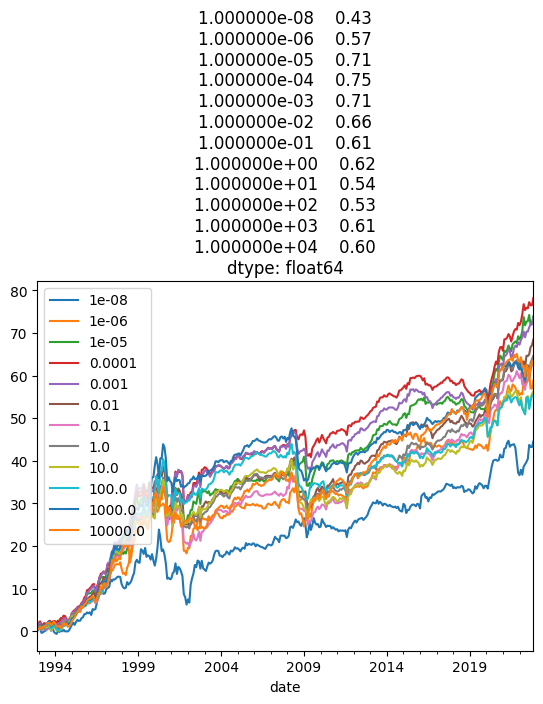

In [ ]:
optimal_random_features, split = efficient_portfolio_oos(raw_factor_returns=random_feature_managed_returns)

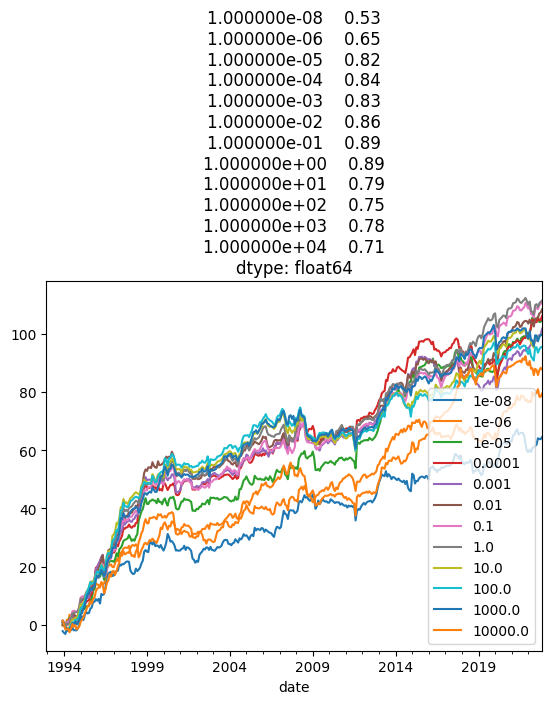

In [ ]:
# does risk management help
vol_managed_rf = volatility_managed_returns(optimal_random_features, 12)
vol_managed_rf.cumsum().plot()
sr = sharpe_ratio(vol_managed_rf)
plt.title(f'{sr}')
plt.show()

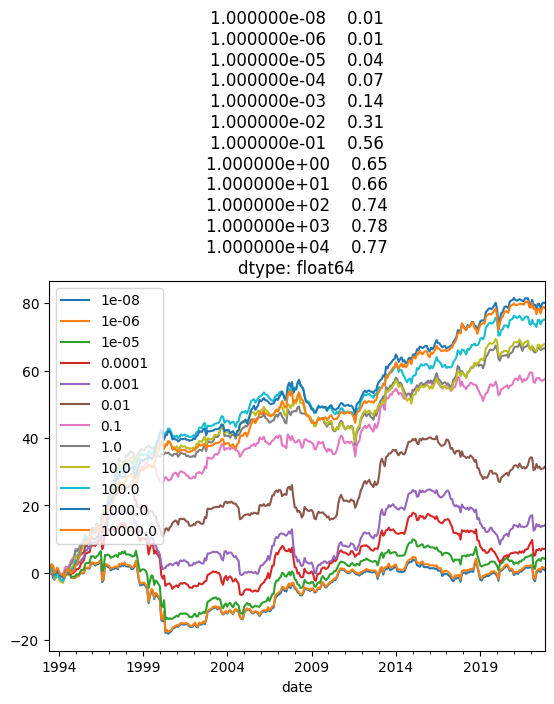

In [ ]:
# what if we manage each of them individually:
individually_managed = volatility_managed_returns(random_feature_managed_returns, 12).dropna()
optimal_random_features_individually_managed, split = efficient_portfolio_oos(raw_factor_returns=individually_managed)

We now investigate if the non-linear random features are adding anything to the original, linear model

In [ ]:
tstats = pd.concat([regression_with_tstats(predicted_variable=optimal_random_features[col].fillna(0),
                                           explanatory_variables=pd.concat([simple_managed_benchmark.fillna(0).iloc[split:], optimal[10]], axis=1).fillna(0).reindex(optimal_random_features[col].index).fillna(0)) for col in optimal], axis=1)
tstats.columns = optimal.columns
print(tstats)

       1.000000e-08  1.000000e-06  1.000000e-05  1.000000e-04  1.000000e-03  \
const           1.5           1.8           2.4           2.5           2.0   
0.0            -1.5          -1.4          -1.0          -0.9          -1.9   
10.0            1.8           1.7           1.3           1.4           2.3   

       1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  1.000000e+02  \
const           1.6           1.5           1.6           0.9           0.5   
0.0            -2.8          -3.6          -3.9          -4.5          -4.8   
10.0            3.2           3.9           4.2           4.8           5.1   

       1.000000e+03  1.000000e+04  
const           0.4           0.7  
0.0            -2.6           0.9  
10.0            3.2          -0.2  


In [ ]:
tstats = pd.concat([regression_with_tstats(predicted_variable=vol_managed_rf[col].fillna(0),
                                           explanatory_variables=pd.concat([simple_managed_benchmark.fillna(0).iloc[split:], optimal[10]], axis=1).fillna(0).reindex(vol_managed_rf[col].index).fillna(0)) for col in vol_managed_rf], axis=1)
tstats.columns = optimal.columns
print(tstats)

       1.000000e-08  1.000000e-06  1.000000e-05  1.000000e-04  1.000000e-03  \
const           1.8           2.1           2.8           2.5           2.3   
0.0            -0.8          -0.9          -0.5          -0.6          -1.2   
10.0            1.0           1.2           0.9           1.0           1.7   

       1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  1.000000e+02  \
const           2.5           3.3           3.3           2.3           1.6   
0.0            -2.5          -3.7          -4.2          -6.0          -7.1   
10.0            3.0           4.2           4.7           6.6           7.7   

       1.000000e+03  1.000000e+04  
const           1.1           1.0  
0.0            -4.0           1.1  
10.0            5.0          -0.4  


In [ ]:
tstats = pd.concat([regression_with_tstats(predicted_variable=optimal_random_features_individually_managed[col].fillna(0),
                                           explanatory_variables=pd.concat([simple_benchmark.fillna(0).iloc[split:], optimal[10]], axis=1).fillna(0).reindex(optimal_random_features_individually_managed.index).fillna(0)) for col in optimal_random_features_individually_managed], axis=1)
tstats.columns = optimal.columns
print(tstats)

       1.000000e-08  1.000000e-06  1.000000e-05  1.000000e-04  1.000000e-03  \
const          -0.0          -0.0          -0.0          -0.2          -0.1   
0.0            -2.2          -2.2          -2.1          -1.3          -1.4   
10.0            1.8           1.8           2.1           2.4           2.7   

       1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  1.000000e+02  \
const           0.4           1.1           1.0           0.5           0.7   
0.0            -4.1          -5.8          -4.3          -2.7          -1.0   
10.0            5.5          10.0          10.7          11.8          16.4   

       1.000000e+03  1.000000e+04  
const           1.1           1.0  
0.0             1.0           1.6  
10.0           27.9          22.8  


Let us not try to see if deep learning can do even better. Due to memory issues, we will only use data post 1990

In [ ]:
signals = stock_data[momentum_columns]
labels = stock_data['r_1']
date_split = '2000-01-01'

train_signals = signals.loc[(signals.index.get_level_values('date') <= '2000-01-01') & (signals.index.get_level_values('date') >= '1970-01-01')]
train_returns = stock_data['r_1'].loc[(signals.index.get_level_values('date') <= '2000-01-01') & (signals.index.get_level_values('date') >= '1970-01-01')]

test_signals = signals.loc[signals.index.get_level_values('date') > '2000-01-01']
test_returns = stock_data['r_1'].loc[signals.index.get_level_values('date') > '2000-01-01']

In [ ]:
import torch                     # for all things PyTorch
import torch.nn as nn            # for torch.nn.Module, the parent object for PyTorch models
import torch.nn.functional as F  # for the activation function

In [ ]:
def train_loader(signals, returns):
  """
  This is a special DataLoader designed to work with portfolio optimization.
  It creates mini-batches using every month of data
  """
  dates = signals.index.get_level_values('date')
  unique_dates = dates.unique()
  for date in unique_dates:
    #print(f'running date {date}')
    yield torch.tensor(signals.loc[dates == date].values), torch.tensor(returns.loc[dates == date].values)


In [ ]:
import numpy as np

class FlexibleMLP(nn.Module):
    def __init__(self, layers: list, scale: float=1.):
        """
        param: layers = list of integers
        """
        super(FlexibleMLP, self).__init__()

        self.layers = nn.ModuleList()
        self.activations = nn.ModuleList()

        for i in range(len(layers) - 1):
            layer = nn.Linear(layers[i], layers[i+1])

            # LeCun initialization
            nn.init.normal_(layer.weight, mean=0.0, std=scale * np.sqrt(1 / layers[i]))
            nn.init.normal_(layer.bias, mean=0.0, std=0 * np.sqrt(1 / layers[i]))

            self.layers.append(layer)
            # Add ReLU activation after each layer except the last
            if i < len(layers) - 2:
                self.activations.append(nn.ReLU())
            else:
                # Placeholder for the last layer's activation
                self.activations.append(nn.Identity())

    def forward(self, x, return_last_hidden=False):
        last_hidden = None

        for layer, activation in zip(self.layers[:-1], self.activations[:-1]):
            x = activation(layer(x))
            last_hidden = x  # Update last_hidden at each hidden layer

        # Apply the last layer without ReLU (or Identity for the placeholder)
        x = self.layers[-1](x)

        if return_last_hidden:
            return x, last_hidden
        return x


In [ ]:
import random
def mssr_loss(output, target):
  """
  MSRR = Maximal Sharpe Ratio Regression
  This is our MSRR loss through which we evaluate the quality of predictions
  Every mini batch is a month. So,
  (output * target.view((output.shape[0], 1))).sum() is the return on the
  portfolio in that particular month (.sum() is over stocks)
  """
  dist = 1 - (output * target.view((output.shape[0], 1))).sum()
  msrr = torch.pow(dist, 2)
  return msrr

def set_seed(seed_value=42):
    """Set seed for reproducibility."""
    np.random.seed(seed_value)  # Set NumPy seed
    torch.manual_seed(seed_value)  # Set PyTorch seed
    random.seed(seed_value)  # Set Python random seed

    # If you are using CUDA:
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed_value)
        torch.cuda.manual_seed_all(seed_value)  # For multi-GPU
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False

In [ ]:
signals

,,ret_12_1,ret_3_1,ret_6_1,ret_9_1,ret_12_7,ret_1_0
id,date,,,,,,
10145,1963-01-31,0.007293,0.248271,0.404300,0.305466,-0.089951,-0.256906
10161,1963-01-31,0.004052,0.161134,0.070042,0.329582,0.107780,0.294890
10225,1963-01-31,-0.410859,-0.079530,-0.228155,-0.358521,-0.329822,-0.179558
10241,1963-01-31,0.342788,0.006224,0.007628,0.326367,0.448136,-0.219613
10321,1963-01-31,0.435170,-0.249654,0.033981,0.356913,0.375203,0.466851
...,...,...,...,...,...,...,...
93089,2022-11-30,0.000923,-0.008704,0.172396,0.236387,0.066904,-0.099637
93094,2022-11-30,0.467308,0.269551,-0.132552,0.412042,0.476511,-0.158537
93096,2022-11-30,0.329423,0.257599,0.311719,0.409686,0.304698,-0.112351


In [ ]:
# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Loss and optimizer
ridge_penalty = 0.01  # Regularization strength
set_seed(42)  # Fixing the seed

width = 64
model = FlexibleMLP([signals.shape[1], width, 1], scale=1.) # re-initializing weights !!!
criterion = mssr_loss # this is our custom loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.000001)  # Using Adam optimizer for better performance with deep networks

# Training loop
set_seed(0)  # Fixing the seed
num_epochs = 40  # You might need more epochs for a deep network
for epoch in range(num_epochs):
    for inputs, targets in train_loader(train_signals, train_returns):
        # each mini batch is a month of data
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets) # this is (1- portfolio return)^2

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [2/40], Loss: 0.0889
Epoch [4/40], Loss: 0.0907
Epoch [6/40], Loss: 0.0923
Epoch [8/40], Loss: 0.0935
Epoch [10/40], Loss: 0.0945
Epoch [12/40], Loss: 0.0953
Epoch [14/40], Loss: 0.0958
Epoch [16/40], Loss: 0.0962
Epoch [18/40], Loss: 0.0963
Epoch [20/40], Loss: 0.0962
Epoch [22/40], Loss: 0.0959
Epoch [24/40], Loss: 0.0955
Epoch [26/40], Loss: 0.0949
Epoch [28/40], Loss: 0.0942
Epoch [30/40], Loss: 0.0933
Epoch [32/40], Loss: 0.0922
Epoch [34/40], Loss: 0.0911
Epoch [36/40], Loss: 0.0898
Epoch [38/40], Loss: 0.0884
Epoch [40/40], Loss: 0.0869


Text(0.5, 1.0, 'sr=0    0.37\ndtype: float64')

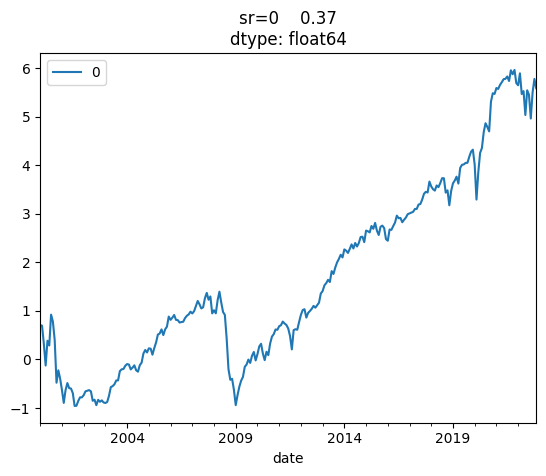

In [ ]:
model.eval()
test_data_predictions = model(torch.tensor(test_signals.values))
managed_returns = build_managed_returns(returns=test_returns, signals=pd.DataFrame(test_data_predictions.detach().numpy(), index=test_returns.index))
managed_returns.cumsum().plot()
plt.title(f'sr={sharpe_ratio(managed_returns)}')

#

All portfolio strategies we have used so far use own-signal weights:
$$
\pi_{i,t}\ =\ w(S_{i,t})\ =\ \sum_k \lambda_k f_k(X_{i,t})
$$
where $\lambda_k$ are estimated through Markowitz.

In [Artificial Intelligence Pricing Models](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=5089371), we show how to build strategies that use other stocks information. The insight is simple: Instead of
$$
\pi_t\ =\ S_t \lambda,
$$
we do
$$
\pi_t\ =\ A_t\,S_t\lambda,
$$
where
$$
A_t\ =\ F(S_t M S_t')
$$
is the attention matrix.

**Expanded Multi-Head Attention for Portfolios**

Let the input matrix be:  
$$
\mathbf{X} \in \mathbb{R}^{N \times d}
$$  
where \( N \) is the number of samples and \( d \) is the (small) input dimension.

We define the number of attention heads as \( h \), and project the input to a higher-dimensional space:
$$
\mathbf{Q} = \mathbf{X} \mathbf{W}^Q, \quad
\mathbf{K} = \mathbf{X} \mathbf{W}^K, \quad
\mathbf{V} = \mathbf{X} \mathbf{W}^V,
$$
with projection matrices:
$$
\mathbf{W}^Q, \mathbf{W}^K, \mathbf{W}^V \in \mathbb{R}^{d \times (h \cdot d)}
$$
We reshape each to:
$$
\mathbf{Q}, \mathbf{K}, \mathbf{V} \in \mathbb{R}^{N \times h \times d}
$$
Each head computes scaled dot-product attention:
$$
\text{Attention}_i(\mathbf{Q}_i, \mathbf{K}_i, \mathbf{V}_i) =
\text{softmax}\left( \frac{\mathbf{Q}_i \mathbf{K}_i^\top}{\sqrt{d}} \right) \mathbf{V}_i
\quad \text{for } i = 1, \dots, h
$$
where
$$
softmax(x)\ =\ \left(\frac{e^{x_i}}{\sum_j e^{x_j}}\right)_{i=1}^N
$$
We stack all head outputs and flatten:
$$
\text{Concat}(\text{head}_1, \dots, \text{head}_h) \in \mathbb{R}^{N \times (h \cdot d)}
$$
Finally, we apply a linear projection to produce scalar predictions:
$$
\hat{\mathbf{y}} = \left[ \text{Concat}(\text{head}_i) \right] \mathbf{W}^O + b, \quad
\mathbf{W}^O \in \mathbb{R}^{(h \cdot d) \times 1}, \quad b \in \mathbb{R}
$$

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


class ExpandedMultiHeadAttention(nn.Module):
    def __init__(self, d_input, num_heads):
        super().__init__()
        self.d_input = d_input
        self.num_heads = num_heads
        self.d_proj = d_input * num_heads  # total projection size

        # Linear layers to project to multi-head space
        self.W_q = nn.Linear(d_input, self.d_proj)
        self.W_k = nn.Linear(d_input, self.d_proj)
        self.W_v = nn.Linear(d_input, self.d_proj)

        # Final output layer
        self.output_layer = nn.Linear(self.d_proj, 1)

        self.reset_parameters()

    def reset_parameters(self):
        nn.init.xavier_uniform_(self.W_q.weight)
        nn.init.xavier_uniform_(self.W_k.weight)
        nn.init.xavier_uniform_(self.W_v.weight)
        nn.init.xavier_uniform_(self.output_layer.weight)
        nn.init.zeros_(self.W_q.bias)
        nn.init.zeros_(self.W_k.bias)
        nn.init.zeros_(self.W_v.bias)
        nn.init.zeros_(self.output_layer.bias)

    def forward(self, X, return_attention=False):
        N, d = X.shape
        assert d == self.d_input

        Q = self.W_q(X)  # (N, h*d)
        K = self.W_k(X)
        V = self.W_v(X)

        Q = Q.view(N, self.num_heads, self.d_input)  # (N, h, d)
        K = K.view(N, self.num_heads, self.d_input)
        V = V.view(N, self.num_heads, self.d_input)

        # Compute attention weights (scalar per head)
        Q_ = Q.unsqueeze(2)  # (N, h, 1, d)
        K_ = K.unsqueeze(3)  # (N, h, d, 1)
        attn_scores = torch.matmul(Q_, K_) / (self.d_input ** 0.5)  # (N, h, 1, 1)
        attn_weights = torch.sigmoid(attn_scores).squeeze(-1).squeeze(-1)  # (N, h)

        # Apply attention weights to V
        attn_output = attn_weights.unsqueeze(-1) * V  # (N, h, d)
        attn_output = attn_output.reshape(N, self.d_proj)  # (N, h*d)

        y = self.output_layer(attn_output)  # (N, 1)

        if return_attention:
            return y, attn_weights
        return y




In [ ]:
def plot_scalar_attention_weights(attn_weights, idx=0, title=None):
    """
    Plot scalar attention weights (shape: N x h) for a specific sample.
    """
    weights = attn_weights[idx].detach().cpu()
    num_heads = weights.shape[0]

    plt.figure(figsize=(num_heads, 3))
    plt.bar(range(num_heads), weights)
    plt.xticks(range(num_heads), [f"Head {i+1}" for i in range(num_heads)])
    plt.ylabel("Attention Weight")
    if title:
        plt.title(title)
    plt.show()


Output shape: torch.Size([16, 1])
Attention shape: torch.Size([16, 4])


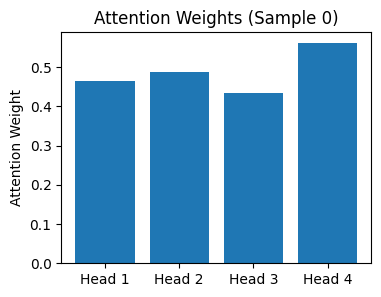

In [ ]:
d = 6
h = 4
N = 16

model = ExpandedMultiHeadAttention(d_input=d, num_heads=h)
X = torch.randn(N, d)

y_pred, attn_weights = model(X, return_attention=True)
print("Output shape:", y_pred.shape)
print("Attention shape:", attn_weights.shape)

plot_scalar_attention_weights(attn_weights, idx=0, title="Attention Weights (Sample 0)")

In [ ]:
N, d = 32, 6    # small, indivisible d
h = 5           # 5 heads, total projection size = 30
X = torch.randn(N, d)

mha = ExpandedMultiHeadAttention(d_input=d, num_heads=h)
y_pred = mha(X)   # shape: (N, 1)
print(y_pred.shape)

torch.Size([32, 1])


In [ ]:
# Proceed with the rest of the setup (loss, optimizer) and training loop as before
# Loss and optimizer
set_seed(42)  # Fixing the seed
model = ExpandedMultiHeadAttention(d_input=signals.shape[1], num_heads=1) # re-initializing weights !!!
criterion = mssr_loss # this is our custom loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.00001)  # Using Adam optimizer for better performance with deep networks

# Training loop
set_seed(0)  # Fixing the seed
num_epochs = 40  # You might need more epochs for a deep network
for epoch in range(num_epochs):
    for inputs, targets in train_loader(train_signals, train_returns):
        # each mini batch is a month of data
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets) # this is (1- portfolio return)^2

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [2/40], Loss: 0.0009
Epoch [4/40], Loss: 0.0001
Epoch [6/40], Loss: 0.0019
Epoch [8/40], Loss: 0.0057
Epoch [10/40], Loss: 0.0109
Epoch [12/40], Loss: 0.0169
Epoch [14/40], Loss: 0.0234
Epoch [16/40], Loss: 0.0300
Epoch [18/40], Loss: 0.0363
Epoch [20/40], Loss: 0.0421
Epoch [22/40], Loss: 0.0472
Epoch [24/40], Loss: 0.0514
Epoch [26/40], Loss: 0.0546
Epoch [28/40], Loss: 0.0568
Epoch [30/40], Loss: 0.0579
Epoch [32/40], Loss: 0.0580
Epoch [34/40], Loss: 0.0571
Epoch [36/40], Loss: 0.0552
Epoch [38/40], Loss: 0.0526
Epoch [40/40], Loss: 0.0492


Why does it diverge? This is mysterios, but is a typical phenomenon in transformers!!!  
One practical solution is to have parameter scales that are parameter-specific

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt


class ExpandedMultiHeadAttention(nn.Module):
    """
    Multi-Head Attention across N samples (no sequence dimension).
    This module computes attention weights between all samples in the batch,
    similar to standard self-attention across tokens in a sequence.

    Each head sees all N samples as both queries and keys.
    """

    def __init__(self, d_input, num_heads, init_fn_dict=None, scale_dict=None):
        """
        Parameters:
        - d_input (int): Input feature dimension.
        - num_heads (int): Number of attention heads.
        - init_fn_dict (dict): Optional dict mapping parameter names to init functions.
        - scale_dict (dict): Optional dict mapping parameter names to scale factors.
        """
        super().__init__()

        self.d_input = d_input                   # Original input dimension
        self.num_heads = num_heads               # Number of attention heads
        self.d_proj = d_input * num_heads        # Projected dimension after multi-head concat

        # Linear projections for Q, K, V. These will be reshaped into heads later
        self.W_q = nn.Linear(d_input, self.d_proj)
        self.W_k = nn.Linear(d_input, self.d_proj)
        self.W_v = nn.Linear(d_input, self.d_proj)

        # Final output layer to map multi-head output to scalar prediction
        self.output_layer = nn.Linear(self.d_proj, 1)

        # Optional dictionaries for custom parameter initialization and scaling
        self.init_fn_dict = init_fn_dict or {}
        self.scale_dict = scale_dict or {}

        # Initialize weights
        self.reset_parameters()

    def reset_parameters(self):
        """
        Applies parameter-specific initialization and scaling.
        Falls back to Xavier initialization and 1.0 scale if unspecified.
        """

        def apply_init(name, param):
            # Use user-specified init function or default to Xavier
            init_fn = self.init_fn_dict.get(name, nn.init.xavier_uniform_)
            init_fn(param)

        def apply_scale(name, param):
            # Multiply weights by a custom scalar (if provided)
            scale = self.scale_dict.get(name, 1.0)
            param.data.mul_(scale)

        # Initialize weights and biases for each projection layer
        for name, layer in zip(['W_q', 'W_k', 'W_v', 'output'],
                               [self.W_q, self.W_k, self.W_v, self.output_layer]):
            apply_init(name + '_weight', layer.weight)  # Initialize weights
            nn.init.zeros_(layer.bias)                  # Zero the bias
            apply_scale(name + '_weight', layer.weight) # Scale the weights

    def forward(self, X, return_attention=False):
        """
        Forward pass of multi-head self-attention.

        Parameters:
        - X: (N, d_input) input tensor
        - return_attention (bool): if True, also return attention weights

        Returns:
        - y: (N, 1) output predictions
        - attn_weights (optional): (N, num_heads, N) attention scores for each head
        """
        N, d = X.shape
        assert d == self.d_input, "Input feature size mismatch"

        # Project input into Q, K, V for all heads: shape (N, h * d_input)
        Q = self.W_q(X)
        K = self.W_k(X)
        V = self.W_v(X)

        # Reshape each into (N, h, d_input) so each head has its own d_input-dim space
        Q = Q.view(N, self.num_heads, self.d_input)
        K = K.view(N, self.num_heads, self.d_input)
        V = V.view(N, self.num_heads, self.d_input)

        # Transpose to (h, N, d_input): each head is a separate batch
        Q = Q.permute(1, 0, 2)
        K = K.permute(1, 0, 2)
        V = V.permute(1, 0, 2)

        # Compute raw attention scores with scaled dot product:
        #   (h, N, d) x (h, d, N) -> (h, N, N)
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / (self.d_input ** 0.5)

        # Apply softmax over keys (last dimension): (h, N, N)
        attn_weights = F.softmax(attn_scores, dim=-1)

        # Apply attention weights to values:
        #   (h, N, N) x (h, N, d) -> (h, N, d)
        attn_output = torch.matmul(attn_weights, V)

        # Recombine heads: (h, N, d) -> (N, h, d)
        attn_output = attn_output.permute(1, 0, 2)

        # Flatten across heads: (N, h, d) -> (N, h * d)
        attn_output = attn_output.reshape(N, self.d_proj)

        # Final output projection: (N, h * d) -> (N, 1)
        y = self.output_layer(attn_output)

        # Return predictions and optionally attention weights (transpose to (N, h, N))
        return (y, attn_weights.permute(1, 0, 2)) if return_attention else y


In [ ]:
def plot_attention_heatmaps(attn_weights, title=None, idx_range=None):
    """
    Plot attention matrices for each head.

    Parameters:
    - attn_weights: (N, num_heads, N) tensor of attention scores
    - title: optional title for the full figure
    - idx_range: tuple (start, end), optional crop of matrix
    """
    N, num_heads, _ = attn_weights.shape

    # Optionally crop attention matrix to a slice of samples
    if idx_range:
        start, end = idx_range
        attn_weights = attn_weights[start:end, :, start:end]
        N = end - start

    # Create one subplot per head
    fig, axes = plt.subplots(1, num_heads, figsize=(4 * num_heads, 4))
    if num_heads == 1:
        axes = [axes]  # handle single-head case

    for h in range(num_heads):
        ax = axes[h]
        # Show attention weight heatmap: rows = queries, cols = keys
        im = ax.imshow(attn_weights[:, h, :].detach().cpu(), cmap="viridis", aspect='auto')
        ax.set_title(f"Head {h + 1}")
        ax.set_xlabel("Key Index")
        ax.set_ylabel("Query Index")
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

    if title:
        plt.suptitle(title)
    plt.tight_layout()
    plt.show()


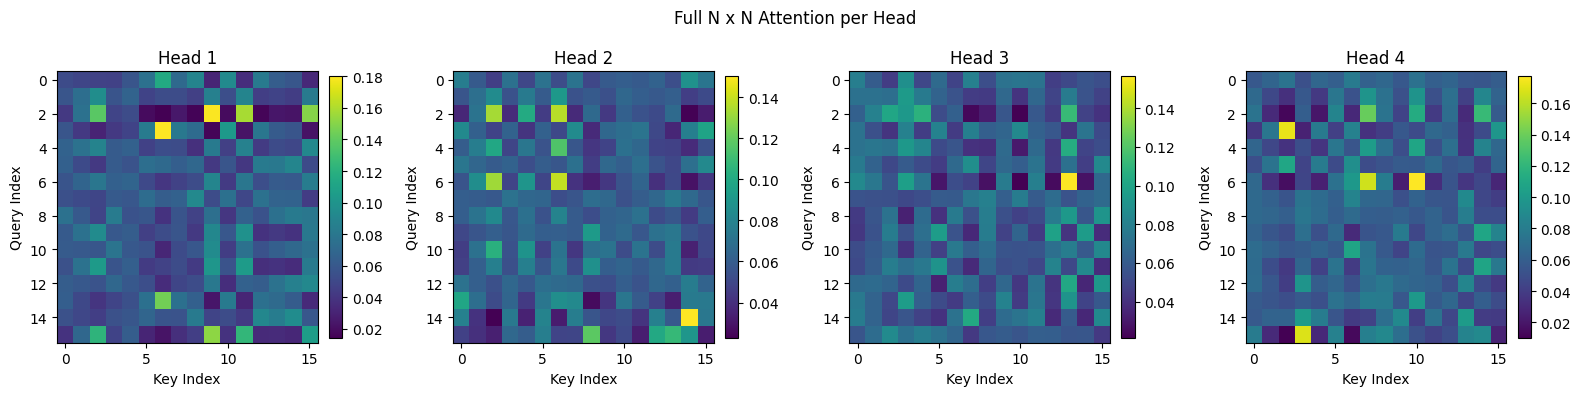

In [ ]:
d = 6
h = 4
N = 16

model = ExpandedMultiHeadAttention(d_input=d, num_heads=h)
X = torch.randn(N, d)

y_pred, attn_weights = model(X, return_attention=True)  # attn_weights: (N, h, N)
plot_attention_heatmaps(attn_weights, title="Full N x N Attention per Head")


Output shape: torch.Size([16, 1])
Attention shape: torch.Size([16, 4, 16])


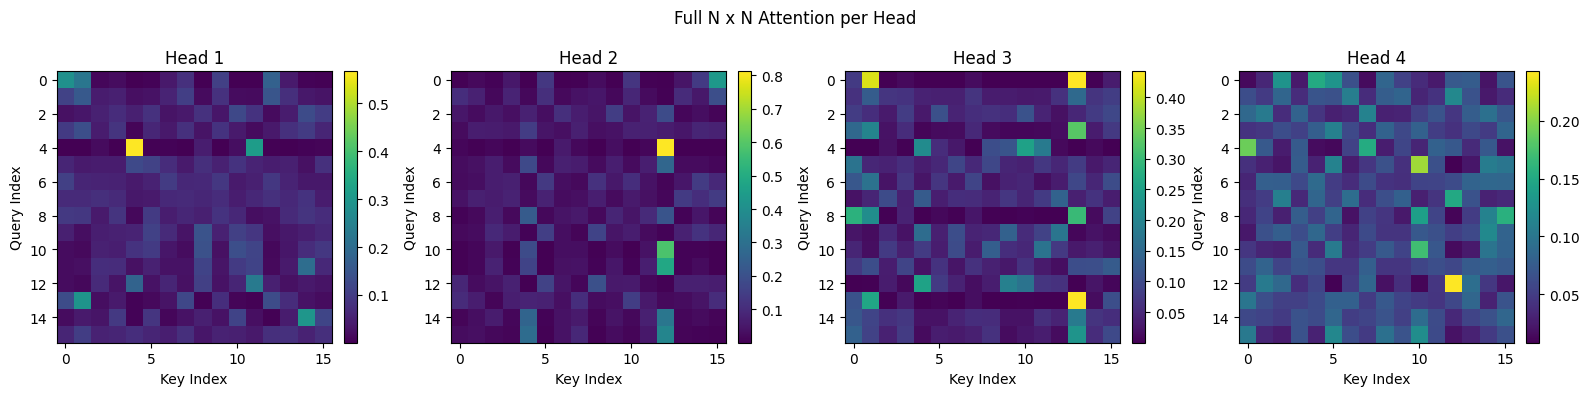

In [ ]:

# Model config
d = 6         # Input dimension
h = 4         # Number of heads
N = 16        # Batch size

# Optional: custom initialization and scaling
init_fns = {
  'W_q_weight': nn.init.kaiming_uniform_,
  'W_k_weight': nn.init.xavier_normal_,
  'W_v_weight': lambda w: nn.init.constant_(w, 0.5),
  'output_weight': nn.init.xavier_uniform_,
}

scales = {
  'W_q_weight': 0.9,
  'W_v_weight': 0.1
}

# Create model
model = ExpandedMultiHeadAttention(d_input=d, num_heads=h,
                                  init_fn_dict=init_fns,
                                  scale_dict=scales)

# Dummy input
X = torch.randn(N, d)

# Forward pass
y_pred, attn_weights = model(X, return_attention=True)
print("Output shape:", y_pred.shape)        # (N, 1)
print("Attention shape:", attn_weights.shape)  # (N, h)
plot_attention_heatmaps(attn_weights, title="Full N x N Attention per Head")


We now investigate the role of initialization for convergence

In [ ]:
# Optional: custom initialization and scaling
init_fns = {
  'W_q_weight': nn.init.kaiming_uniform_,
  'W_k_weight': nn.init.xavier_normal_,
  'W_v_weight': lambda w: nn.init.constant_(w, 0.),
  'output_weight': nn.init.xavier_uniform_,
}

scales = {
  'W_q_weight': 0.05,
  'W_v_weight': 0.01,
  'W_k_weight': 0.01,
  'output_weight': 10.
}

#heads
h = 1

# Create model
model = ExpandedMultiHeadAttention(d_input=signals.shape[1],
                                   num_heads=h,
                                  init_fn_dict=init_fns,
                                  scale_dict=scales)
criterion = mssr_loss # this is our custom loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer for better performance with deep networks

# Training loop
set_seed(10)  # Fixing the seed
num_epochs = 60  # You might need more epochs for a deep network
for epoch in range(num_epochs):
    for inputs, targets in train_loader(train_signals, train_returns):
        # each mini batch is a month of data
        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets) # this is (1- portfolio return)^2

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [2/60], Loss: 1.7673
Epoch [4/60], Loss: 2.2612
Epoch [6/60], Loss: 2.0104
Epoch [8/60], Loss: 1.8184
Epoch [10/60], Loss: 1.6956
Epoch [12/60], Loss: 1.6060
Epoch [14/60], Loss: 1.5336
Epoch [16/60], Loss: 1.4708
Epoch [18/60], Loss: 1.4142
Epoch [20/60], Loss: 1.3633
Epoch [22/60], Loss: 1.3186
Epoch [24/60], Loss: 1.2810
Epoch [26/60], Loss: 1.2507
Epoch [28/60], Loss: 1.2265
Epoch [30/60], Loss: 1.2052
Epoch [32/60], Loss: 1.1819
Epoch [34/60], Loss: 1.1510
Epoch [36/60], Loss: 1.1078
Epoch [38/60], Loss: 1.0507
Epoch [40/60], Loss: 0.9812
Epoch [42/60], Loss: 0.9033
Epoch [44/60], Loss: 0.8220
Epoch [46/60], Loss: 0.7418
Epoch [48/60], Loss: 0.6658
Epoch [50/60], Loss: 0.5962
Epoch [52/60], Loss: 0.5337
Epoch [54/60], Loss: 0.4784
Epoch [56/60], Loss: 0.4301
Epoch [58/60], Loss: 0.3880
Epoch [60/60], Loss: 0.3516


In [ ]:
model.eval()
test_data_predictions = model(torch.tensor(test_signals.values))
managed_returns = build_managed_returns(returns=test_returns, signals=pd.DataFrame(test_data_predictions.detach().numpy(), index=test_returns.index))
managed_returns.cumsum().plot()
plt.title(f'sr={sharpe_ratio(managed_returns)}')